In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
raceDistribution = pd.read_csv('/Users/eve65/HackDTech/pikapixels/data_sets/NC_counties_byRace.csv')
testSites = pd.read_csv('/Users/eve65/HackDTech/pikapixels/data_sets/NC_testSites.csv')
raceDistribution.info()
testSites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   STNAME      100 non-null    object
 2   CTYNAME     100 non-null    object
 3   TOT_POP     100 non-null    int64 
 4   TOT_MALE    100 non-null    int64 
 5   TOT_FEMALE  100 non-null    int64 
 6   WA_MALE     100 non-null    int64 
 7   WA_FEMALE   100 non-null    int64 
 8   BA_MALE     100 non-null    int64 
 9   BA_FEMALE   100 non-null    int64 
 10  IA_MALE     100 non-null    int64 
 11  IA_FEMALE   100 non-null    int64 
 12  AA_MALE     100 non-null    int64 
 13  AA_FEMALE   100 non-null    int64 
 14  NA_MALE     100 non-null    int64 
 15  NA_FEMALE   100 non-null    int64 
 16  TOM_MALE    100 non-null    int64 
dtypes: int64(15), object(2)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131387 entries, 0 to 131386
Data c

In [11]:
testSites.head()

,Unnamed: 0,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,Instructions,...,appt_only,referral_required,services_offered_onsite,call_first,virtual_screening,health_dept_url,State,county,type_of_test,facility_type
0,200,Novant Health Screening Center,"111 Gateway Center Drive, Kernersville, NC 27284",Forsyth County,Novant Health,Non Profit,1-877-499-1697,https://www.novanthealth.org/healthy-headlines...,8am - 5pm M-F,People who have no symptoms will not be tested...,...,Yes,Yes,screening and testing,Yes,Available,https://www.ncdhhs.gov/,NC,Forsyth,molecular,Clinic
1,206,Novant Health Screening Center,"600 Highland Oaks Drive, Winston-Salem, NC 27103",Forsyth County,Novant Health,Non Profit,1-877-499-1697,https://www.novanthealth.org/healthy-headlines...,8am - 5pm M-F,People who have no symptoms will not be tested...,...,Yes,Yes,screening and testing,Yes,NaN,https://www.ncdhhs.gov/,NC,Forsyth,molecular,Clinic
2,218,Temporary Respiratory Symptom Clinic,"1814 Westchester Dr., Suite 202, High Point",Guilford County,Wake Forest Baptist Health,Non Profit,336-702-6843,https://www.wakehealth.edu/Coronavirus/Updates...,"8am - 5pm M-F by appointment only, 1pm - 5pm S...",While patients can be assessed at these locati...,...,Yes,Yes,NaN,Yes,NaN,https://www.ncdhhs.gov/,NC,Guilford,molecular,Clinic
3,309,NextCare Urgent Care: Burlington,"1713 South Church Street, Burlington, NC 27215",Burlington,"NextCare Holdings, Inc",Private,336-222-8888,https://nextcare.com/curbside/,Monday: 8:00AM - 8:00PM Tuesday: 8:00AM - ...,Only individuals meeting certain symptom crite...,...,Yes,No,screening and testing,Yes,Available,https://www.ncdhhs.gov/,NC,Alamance,molecular and antibody,Urgent Care
4,392,Thomasville Screening Center,"903 Randolph St, Thomasville, NC 27360",Thomasville,Novant Health,Regional,877-966-8268,https://coronavirus.novanthealth.org/,"Monday to Friday, 8 a.m. to 5 p.m",Novant Health GoHealth Urgent Care locations a...,...,Yes,Yes,screening and testing,Yes,Available,https://www.co.davidson.nc.us/200/Health,NC,Davidson,molecular,Non-medical Facility


In [80]:
isDurham = testSites['county'] == 'Durham'
isBuncombe = testSites['county'] == 'Buncombe'
isGas = testSites['county'] == 'Gaston'
isNewHanover = testSites['county'] == 'New Hanover'
isUni = testSites['county'] == 'Union'

durham_testSites = testSites[isDurham] ## 5
buncombe_testSites = testSites[isBuncombe] ## 0 test Sites
gas_testSites = testSites[isGas] ## 1 test Sites
newHanover_testSites = testSites[isNewHanover] ## 2
uni_testSites = testSites[isUni] ## 0
uni_testSites.head()


,Unnamed: 0,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,Instructions,...,appt_only,referral_required,services_offered_onsite,call_first,virtual_screening,health_dept_url,State,county,type_of_test,facility_type
131126,7595,CVS Health COVID-19 Drive Thru Testing Site - ...,"1142 North Broom Street, Waxhaw, NC 28173",NaN,CVS,Private,none,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,CVS Health drive-up testing for COVID-19 – lim...,...,Yes,No,testing only,NaN,Required,https://www.nc.gov/covid19,NC,Union,molecular,Retail
131222,8888,FastMed Urgent Care,"2242-A W Roosevelt Blvd\nMonroe, NC 28110",Monroe,FastMed,Private,704-220-1904,https://www.fastmed.com/urgent-care-centers/mo...,"M-F 8am-8pm, Sat & Sun 8am-4pm",COVID-19 diagnostic and antibody testing is av...,...,No,No,screening and testing,No,NaN,https://www.ncdhhs.gov/,NC,Union,molecular and antibody,Urgent Care


In [47]:
isPopNearDurham = (raceDistribution['TOT_POP'] >= 200000) & (raceDistribution['TOT_POP'] <= 300000)
pop_nearDurham = raceDistribution[isPopNearDurham]
pop_nearDurham.info()

pop_nearDurham.to_csv('./data_sets/population_near_Durham.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10 to 89
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5 non-null      int64 
 1   STNAME      5 non-null      object
 2   CTYNAME     5 non-null      object
 3   TOT_POP     5 non-null      int64 
 4   TOT_MALE    5 non-null      int64 
 5   TOT_FEMALE  5 non-null      int64 
 6   WA_MALE     5 non-null      int64 
 7   WA_FEMALE   5 non-null      int64 
 8   BA_MALE     5 non-null      int64 
 9   BA_FEMALE   5 non-null      int64 
 10  IA_MALE     5 non-null      int64 
 11  IA_FEMALE   5 non-null      int64 
 12  AA_MALE     5 non-null      int64 
 13  AA_FEMALE   5 non-null      int64 
 14  NA_MALE     5 non-null      int64 
 15  NA_FEMALE   5 non-null      int64 
 16  TOM_MALE    5 non-null      int64 
dtypes: int64(15), object(2)
memory usage: 720.0+ bytes


sites = np.array[5,0,1,2,0]
popul = np.array[276563,241172,206886,205996,204888]

plt.plot(sites,popul)

Text(0, 0.5, 'Number of Sites')

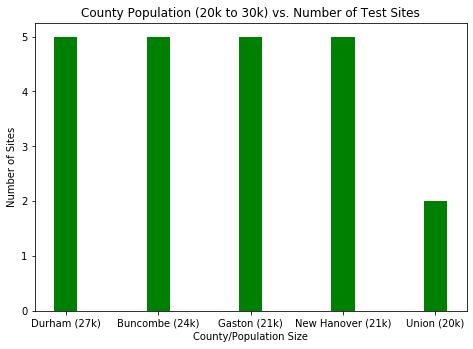

In [81]:
sites = np.array([5,5,5,5,2])
popul = np.array([27,24,21,21,20])
ax = plt.figure().add_axes([0,0,1,1])
counties = ['Durham (27k)','Buncombe (24k)','Gaston (21k)','New Hanover (21k)','Union (20k)']
X = np.arange(5)
ax.bar(counties, sites, color = 'g', width = 0.25)

plt.title('County Population (20k to 30k) vs. Number of Test Sites')
plt.xlabel('County/Population Size')
plt.ylabel('Number of Sites')
